# **Case Study: Predicting Customer Churn in a Telecom Company**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Q.1) Import essential libraries for data analysis,**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Q.2) Load the Airbnb dataset from a CSV file into a pandas DataFrame**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Atomcamp/Airbnb.csv")

# **Q.3) Print the first 20 rows of the dataset to get an initial understanding of its structure and content.**

In [ ]:
df.head(20)

,id,name,host_id,host_name,neighbourhood group,neighbourhood,latitude,longitude,room type,price,minimum nights,number_of_reviews,last review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9,11/19/2018,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3.0,74,6/22/2019,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60.0,45.0,49,10/5/2017,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79.0,2.0,430,6/24/2019,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79.0,2.0,118,7/21/2017,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150.0,1.0,160,6/9/2019,1.33,4,188


# **Q.4) Find out the shape of dataset and what does it indicate?**

In [ ]:
df.shape

(48900, 16)

Above code state we have 48900 rows and 16 columns

# **Q.5) List all column names and replace spaces in column labels with underscores “ _ “ for consistency and ease of use**

Question has two parts:

(a) List all column names
(b) Replace spaces in column labels with underscores

In [ ]:
# Part (a)
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood group',
       'neighbourhood', 'latitude', 'longitude', 'room type', 'price',
       'minimum nights', 'number_of_reviews', 'last review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
# Part (b)
df.columns.str.replace(' ', '_')

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

# **Q.6) Check the data types of each attribute to understand what type of data each column holds**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48900 entries, 0 to 48899
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48900 non-null  int64  
 1   name                            48884 non-null  object 
 2   host_id                         48900 non-null  int64  
 3   host_name                       48879 non-null  object 
 4   neighbourhood group             48900 non-null  object 
 5   neighbourhood                   48900 non-null  object 
 6   latitude                        48900 non-null  float64
 7   longitude                       48900 non-null  float64
 8   room type                       48900 non-null  object 
 9   price                           48900 non-null  float64
 10  minimum nights                  48900 non-null  float64
 11  number_of_reviews               48900 non-null  int64  
 12  last review                     

# **Q.7) Convert the minimum_night and price columns from float to integer types after removing any non-numeric characters (e.g., currency symbols). Convert last_review to a datetime type.**

# **Q.8) Share the information of dataset. What is the importance of it in EDA?**

Exploratory Data Analysis (EDA) helps in cleaning data by:

1) Identifying Duplicates: Detect and remove duplicate records.

2) Handling Missing Values: Locate and address null values.

3) Checking Data Types: Ensure correct data types (numerical, categorical).

4) Analyzing Summary Statistics: Understand central tendencies and data distribution.

5) Visualizing Data: Use plots to uncover patterns and outliers.

EDA is crucial for ensuring data quality and preparing it for further analysis.

# **Q.9) Provide summary statistics for numerical columns. Highlight any unusual calculation you find (If any)**

In [ ]:
# Calculate summary statistics for numerical columns

df.describe()

,id,host_id,latitude,longitude,price,minimum nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.890000e+04,4.890000e+04,48900.000000,48900.000000,48900.000000,48900.000000,48900.000000,38848.000000,48900.000000,48900.000000
mean,1.901520e+07,6.761310e+07,40.728949,-73.952172,152.720545,7.032199,23.279693,1.373126,7.143374,112.783742
std,1.098423e+07,7.860992e+07,0.054529,0.046155,240.142698,20.513749,44.555777,1.680367,32.950889,131.626347
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.470353e+06,7.812758e+06,40.690100,-73.983072,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967620e+07,3.079058e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915173e+07,1.074344e+08,40.763112,-73.936280,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# **Q.10) Provide summary statistics for categorical columns Highlight any unusual calculation you find (If any)**

In [ ]:
df.describe(include='O')

#df.describe(include=[object])

,name,host_name,neighbourhood group,neighbourhood,room type,last review
count,48884,48879,48900,48900,48900,38848
unique,47896,11452,6,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,6/23/2019
freq,18,417,21664,3920,25413,1413


# **Q.11) Identify duplicate rows in the dataset and remove them to ensure data integrity.**

In [ ]:
# Initial check of duplicates
df.duplicated().sum()

5

In [ ]:
df[df.duplicated()]

,id,name,host_id,host_name,neighbourhood group,neighbourhood,latitude,longitude,room type,price,minimum nights,number_of_reviews,last review,reviews_per_month,calculated_host_listings_count,availability_365
11,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45,5/21/2019,0.38,2,355
12,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60.0,45.0,49,10/5/2017,0.40,1,0
13,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135.0,5.0,53,6/22/2019,0.43,1,6
19,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120.0,90.0,27,10/31/2018,0.22,1,0
21,7097,Perfect for Your Parents + Garden,17571,Jane,Brooklyn,Fort Greene,40.69169,-73.97185,Entire home/apt,215.0,2.0,198,6/28/2019,1.72,1,321


In [ ]:
# Droping duplicates
df = df.drop_duplicates()

In [ ]:
# After droping results

df.duplicated().sum()

0

# **Q.12) Check each column for null or empty values to understand the extent of missing data.**

In [ ]:
df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood group,0
neighbourhood,0
latitude,0
longitude,0
room type,0
price,0


# **Q.13) Replace null values in columns with suitable replacements**

Here we see 4 has many missing values i.e, name, host_id, last review, and reviews_per_month

where,

► name is "string" X

► host_id is "number"

► last review is "Date" X

► reviews_per_month "number"

As this question is interconected with Q.14) So, here we will not replace for last reviews, names and id

In [ ]:
# Cleaning missing values in "host_name" and "reviews_per_month"

Lets see main host name in our dataset

In [ ]:
df["host_name"].value_counts().head()

,count
host_name,
Michael,417
David,403
Sonder (NYC),327
John,294
Alex,279


From above data we can concluded "Some of the observation related to host name was not mentioned in given dataset"

Lets confirm it through below code:

In [ ]:
df[df['host_name'].isnull()]

,id,name,host_id,host_name,neighbourhood group,neighbourhood,latitude,longitude,room type,price,minimum nights,number_of_reviews,last review,reviews_per_month,calculated_host_listings_count,availability_365
365,100184,Bienvenue,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50.0,1.0,43,7/8/2019,0.45,1,88
2705,1449546,Cozy Studio in Flatbush,7779204,NaN,Brooklyn,Flatbush,40.64965,-73.96154,Entire home/apt,100.0,30.0,49,1/2/2017,0.69,1,342
5750,4183989,SPRING in the City!! Zen-Style Tranquil Bedroom,919218,NaN,Manhattan,Harlem,40.80606,-73.95061,Private room,86.0,3.0,34,5/23/2019,1.00,1,359
6080,4446862,Charming Room in Prospect Heights!,23077718,NaN,Brooklyn,Crown Heights,40.67512,-73.96146,Private room,50.0,1.0,0,NaN,NaN,1,0
6587,4763327,"Luxurious, best location, spa inc'l",24576978,NaN,Brooklyn,Greenpoint,40.72035,-73.95355,Entire home/apt,195.0,1.0,1,10/20/2015,0.02,1,0
8168,6292866,Modern Quiet Gem Near All,32722063,NaN,Brooklyn,East Flatbush,40.65263,-73.93215,Entire home/apt,85.0,2.0,182,6/19/2019,3.59,2,318
8262,6360224,"Sunny, Private room in Bushwick",33134899,NaN,Brooklyn,Bushwick,40.70146,-73.92792,Private room,37.0,1.0,1,7/1/2015,0.02,1,0
8857,6786181,R&S Modern Spacious Hideaway,32722063,NaN,Brooklyn,East Flatbush,40.64345,-73.93643,Entire home/apt,100.0,2.0,157,6/19/2019,3.18,2,342
9143,6992973,1 Bedroom in Prime Williamsburg,5162530,NaN,Brooklyn,Williamsburg,40.71838,-73.95630,Entire home/apt,145.0,1.0,0,NaN,NaN,1,0
9822,7556587,Sunny Room in Harlem,39608626,NaN,Manhattan,Harlem,40.82929,-73.94182,Private room,28.0,1.0,1,8/1/2015,0.02,1,0


Lets replace all these "NaN" with "date not provided"

In [ ]:
df['host_name'].fillna('date_not_provided',inplace=True)

In [ ]:
df['host_name'].isnull().sum()

0

Lets deal with "reviews_per_month"

In [ ]:
df["reviews_per_month"].value_counts().head()

,count
reviews_per_month,
0.02,919
0.05,893
1.00,893
0.03,804
0.16,667


In [ ]:
# Checking whether it is continuous or categorical?
df["reviews_per_month"].nunique()

937

In [ ]:
df['reviews_per_month'].isnull().sum()

10052

<Axes: >

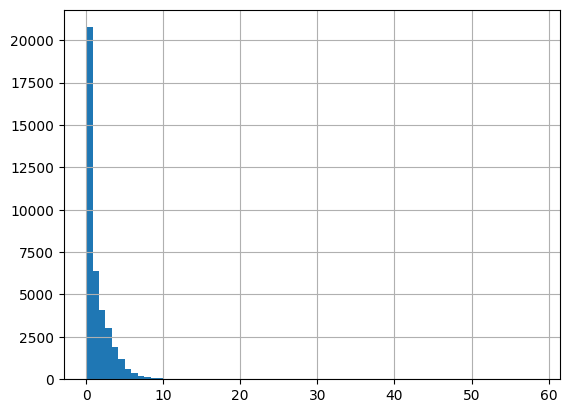

In [ ]:
df["reviews_per_month"].hist(bins=70)

Above data shows the skewedness of the "reviews_per_month." In order to deal with it, we will apply "median" function as a cleaning step

In [ ]:
median_value = df['reviews_per_month'].median()
df['reviews_per_month'] = df['reviews_per_month'].fillna(median_value)

In [ ]:
df['reviews_per_month'].isnull().sum()

0

# **Q.14) Drop columns (last reviews, names and id)**

In [ ]:
# Initial Columns
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood group',
       'neighbourhood', 'latitude', 'longitude', 'room type', 'price',
       'minimum nights', 'number_of_reviews', 'last review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
# Dropping specific columns
df = df.drop(columns=['last review','name','id'], axis=1)

In [ ]:
# After dropping checking
df.columns

Index(['host_id', 'host_name', 'neighbourhood group', 'neighbourhood',
       'latitude', 'longitude', 'room type', 'price', 'minimum nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

# ***Let's check the cleaning results :)***

In [ ]:
df.isnull().sum()

,0
host_id,0
host_name,0
neighbourhood group,0
neighbourhood,0
latitude,0
longitude,0
room type,0
price,0
minimum nights,0
number_of_reviews,0


# **Q.15) Find number of unique values for the columns ‘room type’, 'neighbourhood_group' and 'neighbourhood'. Highlight the unusual answer if any and tackle with it**

In [ ]:
df.columns

Index(['host_id', 'host_name', 'neighbourhood group', 'neighbourhood',
       'latitude', 'longitude', 'room type', 'price', 'minimum nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [ ]:
unique_room_type = df['room type'].nunique()
unique_neighbourhood_group = df['neighbourhood group'].nunique()
unique_neighbourhood = df['neighbourhood'].nunique()

print(f"Number of unique values in 'room_type': {unique_room_type}")
print(f"Number of unique values in 'neighbourhood group': {unique_neighbourhood_group}")
print(f"Number of unique values in 'neighbourhood': {unique_neighbourhood}")

Number of unique values in 'room_type': 3
Number of unique values in 'neighbourhood group': 6
Number of unique values in 'neighbourhood': 221


# **Date Visualizations and Tables**

# **Q.16) What are the top 10 host IDs with the highest number of bookings?**

In [ ]:
top_hosts = df.groupby('host_id')['number_of_reviews'].sum().nlargest(10)

print("Top 10 Host IDs with the Highest Number of Bookings:", top_hosts)

Top 10 Host IDs with the Highest Number of Bookings: host_id
37312959     2273
344035       2205
26432133     2017
35524316     1971
40176101     1818
4734398      1798
16677326     1355
6885157      1346
219517861    1281
23591164     1269
Name: number_of_reviews, dtype: int64


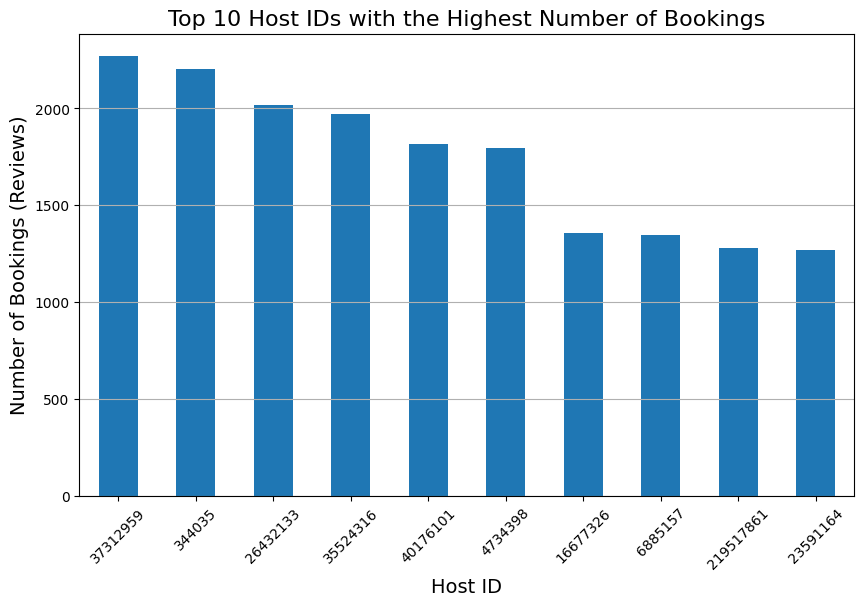

In [ ]:
# Group by 'host_id' and sum the number of bookings (reviews)
top_hosts = df.groupby('host_id')['number_of_reviews'].sum().nlargest(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
top_hosts.plot(kind='bar')

# Adding titles and labels
plt.title('Top 10 Host IDs with the Highest Number of Bookings', fontsize=16)
plt.xlabel('Host ID', fontsize=14)
plt.ylabel('Number of Bookings (Reviews)', fontsize=14)

# Rotating the x-ticks for better readability
plt.xticks(rotation=45)

# Adding grid lines for better readability
plt.grid(axis='y')

# Display the plot
plt.show()

# **Q.17) Identify and list the top 10 host names based on the number of bookings and create a bar chart to visualize this data.**

Here we have 3 tasks:

1) Identify

2) List the top 10 host names based on the number of bookings

3) Create a bar chart to visualize this data.

In [ ]:
# Identifying Top 10 Host Names
df.groupby('host_name')['host_id'].count().sort_values(ascending=False).head(10)

,host_id
host_name,
Michael,417
David,403
Sonder (NYC),327
John,294
Alex,279
Blueground,232
Sarah,227
Daniel,226
Jessica,205


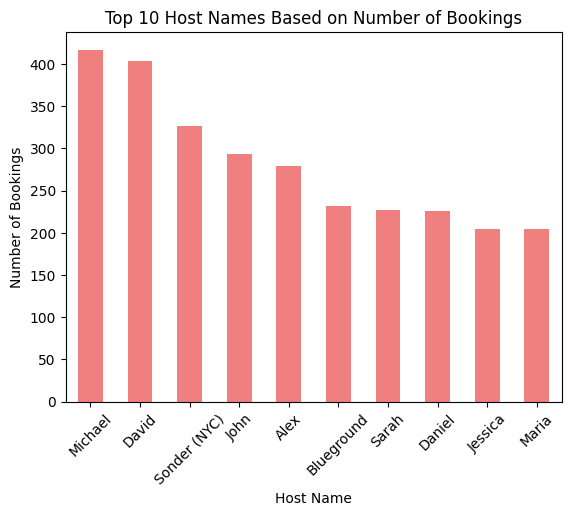

In [ ]:
# Count bookings per host
top_hosts_names = df.groupby('host_name')['host_id'].count().sort_values(ascending=False).head(10)

# Plot the top 10 host names
top_hosts_names.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Host Names Based on Number of Bookings')
plt.xlabel('Host Name')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

# **Q.18) What types of rooms does the host with the highest number of bookings offer, and what is the price range for these rooms?**

From above bar chart we determined the host "Michael" has the highest number of bookings offer.

Let's analyze this specific information

Host with the highest number of bookings: Michael
Room types offered by this host: ['Private room' 'Entire home/apt' 'Shared room']
Price range for these rooms: (25.0, 1700.0)


<ipython-input-38-908d2561f58f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='room type', data=top_host_data, palette='viridis')


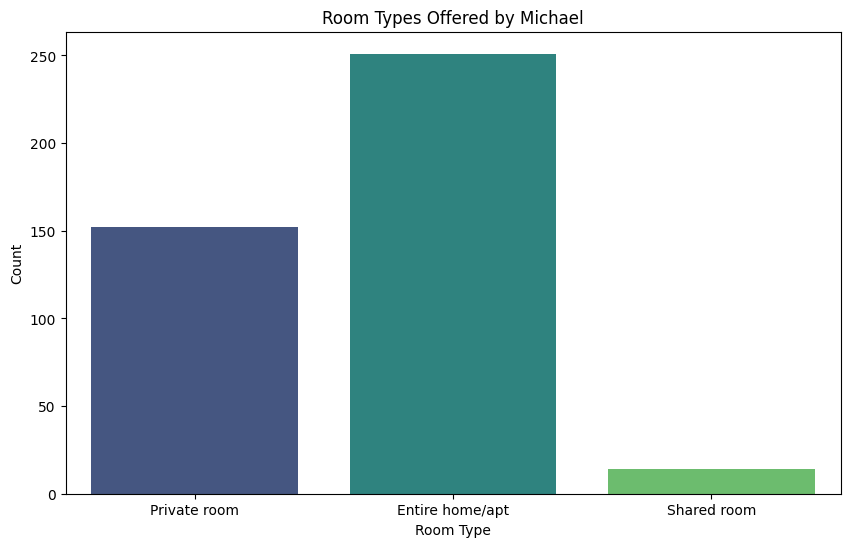

In [ ]:
host_bookings = df.groupby('host_name').size()
top_host = host_bookings.idxmax()  # Get the host with the highest number of bookings

# Step 2: Filter data for the top host
top_host_data = df[df['host_name'] == top_host]

# Determine room types and price range
room_types = top_host_data['room type'].unique()
price_range = (top_host_data['price'].min(), top_host_data['price'].max())

# Display results
print(f"Host with the highest number of bookings: {top_host}")
print(f"Room types offered by this host: {room_types}")
print(f"Price range for these rooms: {price_range}")

plt.figure(figsize=(10, 6))
sns.countplot(x='room type', data=top_host_data, palette='viridis')

# Add labels and title
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title(f'Room Types Offered by {top_host}')

# Show the plot
plt.show()

***The highest room type offer by host was "Entire home/apt room type"***

***Price range for these rooms: (25.0, 1700.0)***

# **Q.20) Identify the neighbourhood group with the highest number of bookings and visualize the data using a pie chart.**

In [ ]:
df.columns

Index(['host_id', 'host_name', 'neighbourhood group', 'neighbourhood',
       'latitude', 'longitude', 'room type', 'price', 'minimum nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

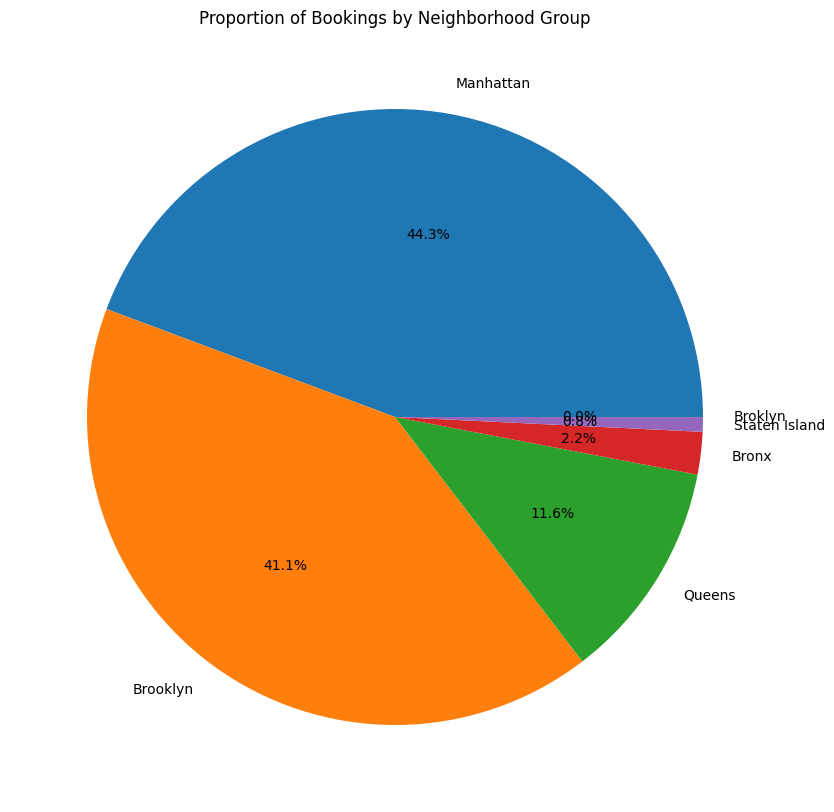

In [ ]:
# Step 1: Count the number of bookings for each neighborhood group
neighborhood_counts = df['neighbourhood group'].value_counts()

# Step 2: Identify the neighborhood group with the highest number of bookings
top_neighborhood_group = neighborhood_counts.idxmax()
top_neighborhood_count = neighborhood_counts.max()

# Step 3: Visualize the data using a pie chart
plt.figure(figsize=(10, 10))
plt.pie(neighborhood_counts, labels=neighborhood_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Bookings by Neighborhood Group')
plt.show()

# **Q.21) Calculate the average price of all listings in the dataset.**

In [ ]:
df["price"].mean()

152.72072134165046

In [ ]:
df.columns

Index(['host_id', 'host_name', 'neighbourhood group', 'neighbourhood',
       'latitude', 'longitude', 'room type', 'price', 'minimum nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'price_category'],
      dtype='object')

Average Price: $152.72


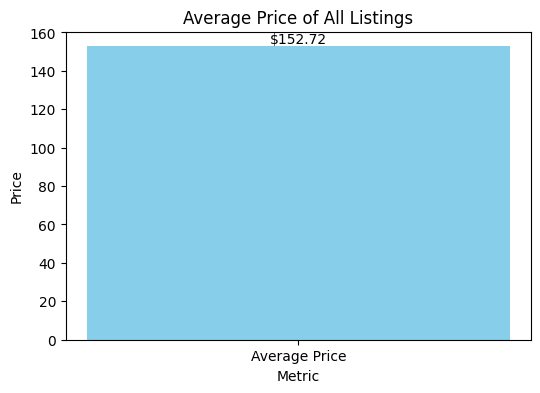

In [ ]:
# Step 1: Calculate the average price of all listings
average_price = df['price'].mean()

# Display the average price
print(f'Average Price: ${average_price:.2f}')

# Step 2: Create a bar chart to visualize the average price
plt.figure(figsize=(6, 4))

# Plot a single bar for the average price
plt.bar('Average Price', average_price, color='skyblue')

# Add labels and title
plt.xlabel('Metric')
plt.ylabel('Price')
plt.title('Average Price of All Listings')

# Display the average price on top of the bar
plt.text('Average Price', average_price, f'${average_price:.2f}', ha='center', va='bottom')

plt.show()

room type
Entire home/apt    211.794312
Private room        89.780973
Shared room         70.127586
Name: price, dtype: float64


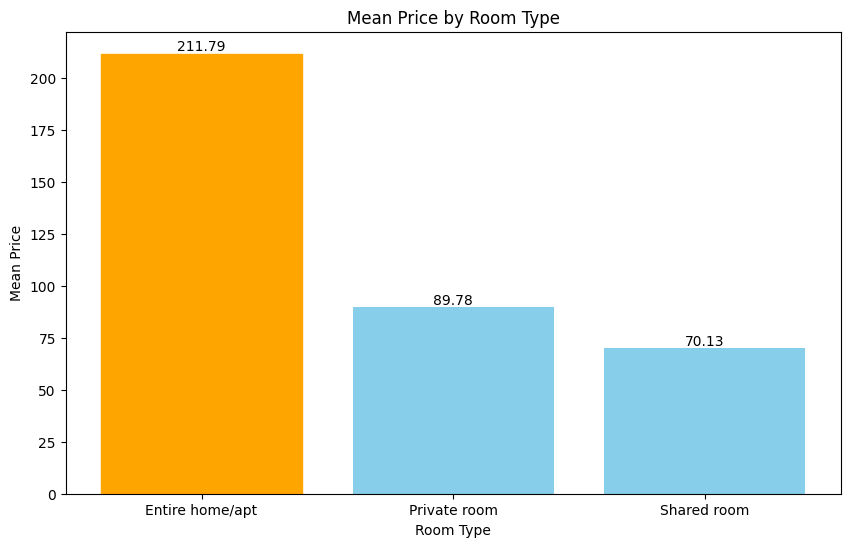

In [ ]:
# Step 1: Group by 'room type' and calculate the mean price
mean_prices = df.groupby('room type')['price'].mean()

# Display the mean prices
print(mean_prices)

# Step 2: Create a bar chart for mean prices by room type
plt.figure(figsize=(10, 6))
bars = plt.bar(mean_prices.index, mean_prices, color='skyblue')

# Highlight the bar with the highest mean price
max_price = mean_prices.max()
for bar in bars:
    if bar.get_height() == max_price:
        bar.set_color('orange')  # Highlight color for the highest mean price

# Add labels and title
plt.xlabel('Room Type')
plt.ylabel('Mean Price')
plt.title('Mean Price by Room Type')

# Display the mean price on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()

# **Q.22 ) Determine the minimum and maximum prices of the listings in the dataset.**

Minimum Price: $0.00
Maximum Price: $10000.00


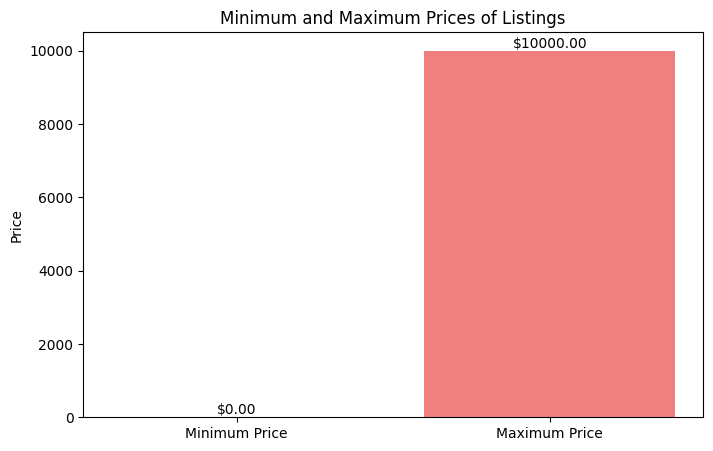

In [ ]:
# Step 1: Calculate the minimum and maximum prices
min_price = df['price'].min()
max_price = df['price'].max()

# Display the minimum and maximum prices
print(f'Minimum Price: ${min_price:.2f}')
print(f'Maximum Price: ${max_price:.2f}')

# Step 2: Create a bar chart for minimum and maximum prices
plt.figure(figsize=(8, 5))

# Data for bar chart
prices = [min_price, max_price]
labels = ['Minimum Price', 'Maximum Price']

# Create bars
bars = plt.bar(labels, prices, color=['lightgreen', 'lightcoral'])

# Add labels and title
plt.ylabel('Price')
plt.title('Minimum and Maximum Prices of Listings')

# Display the prices on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'${height:.2f}', ha='center', va='bottom')

plt.show()

                 min      max
room type                    
Entire home/apt  0.0  10000.0
Private room     0.0  10000.0
Shared room      0.0   1800.0


<ipython-input-67-a5227f65c740>:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, min_prices[i] + 5, f'${min_prices[i]:.2f}', ha='center', va='bottom')
<ipython-input-67-a5227f65c740>:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i + bar_width, max_prices[i] + 5, f'${max_prices[i]:.2f}', ha='center', va='bottom')


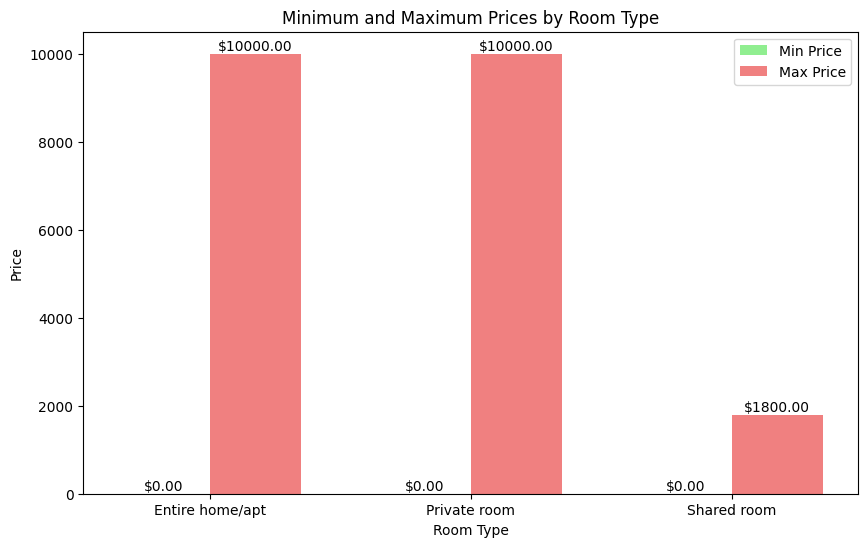

In [ ]:
# Step 1: Calculate the minimum and maximum prices for each room type
price_stats = df.groupby('room type')['price'].agg(['min', 'max'])

# Display the minimum and maximum prices for each room type
print(price_stats)

# Step 2: Create a bar chart for minimum and maximum prices by room type
plt.figure(figsize=(10, 6))

# Flatten the data for plotting
room_types = price_stats.index
min_prices = price_stats['min']
max_prices = price_stats['max']

# Bar chart for min and max prices
bar_width = 0.35  # Width of bars
index = range(len(room_types))  # Positions for bars

plt.bar(index, min_prices, bar_width, label='Min Price', color='lightgreen')
plt.bar([i + bar_width for i in index], max_prices, bar_width, label='Max Price', color='lightcoral')

# Add labels and title
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.title('Minimum and Maximum Prices by Room Type')
plt.xticks([i + bar_width / 2 for i in index], room_types)  # Adjust x-ticks to align with bars
plt.legend()

# Display the prices on top of the bars
for i, room_type in enumerate(room_types):
    plt.text(i, min_prices[i] + 5, f'${min_prices[i]:.2f}', ha='center', va='bottom')
    plt.text(i + bar_width, max_prices[i] + 5, f'${max_prices[i]:.2f}', ha='center', va='bottom')

plt.show()

# **Q.23) Compare the average prices of different room types to see how they vary.**

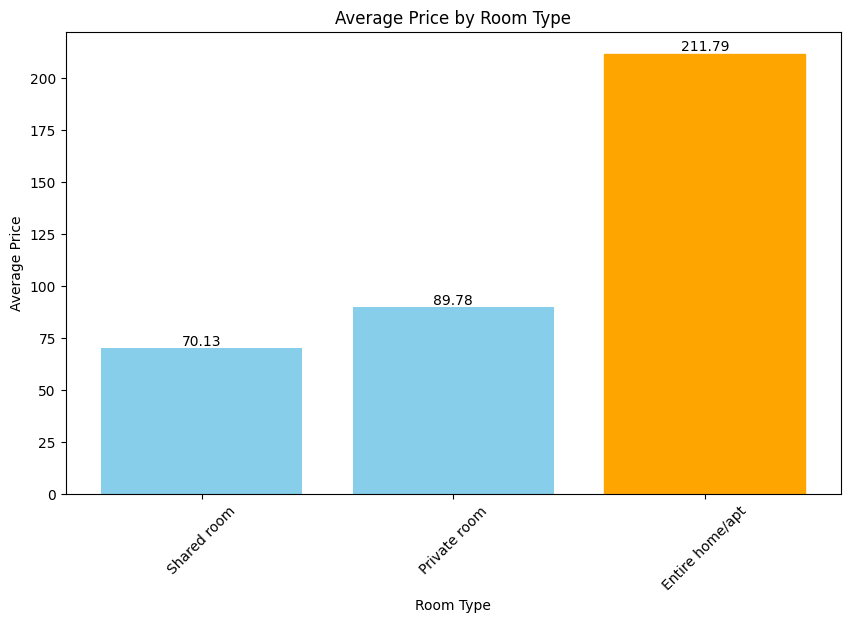

In [ ]:
# Step 1: Calculate the average price for each room type
average_prices = df.groupby('room type')['price'].mean().sort_values()

# Step 2: Create a bar chart to visualize the average prices
plt.figure(figsize=(10, 6))
bars = plt.bar(average_prices.index, average_prices, color='skyblue')

# Highlight the bar with the highest average price
max_price = average_prices.max()
for bar in bars:
    if bar.get_height() == max_price:
        bar.set_color('orange')  # Highlight color for the highest price

# Add labels and title
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.title('Average Price by Room Type')
plt.xticks(rotation=45)

# Display the average price on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()

# **Q.24) Identify the neighbourhood group with the highest number of reviews and highlight any interesting findings**

Neighborhood group with the highest number of reviews: Brooklyn
Total reviews: 486402


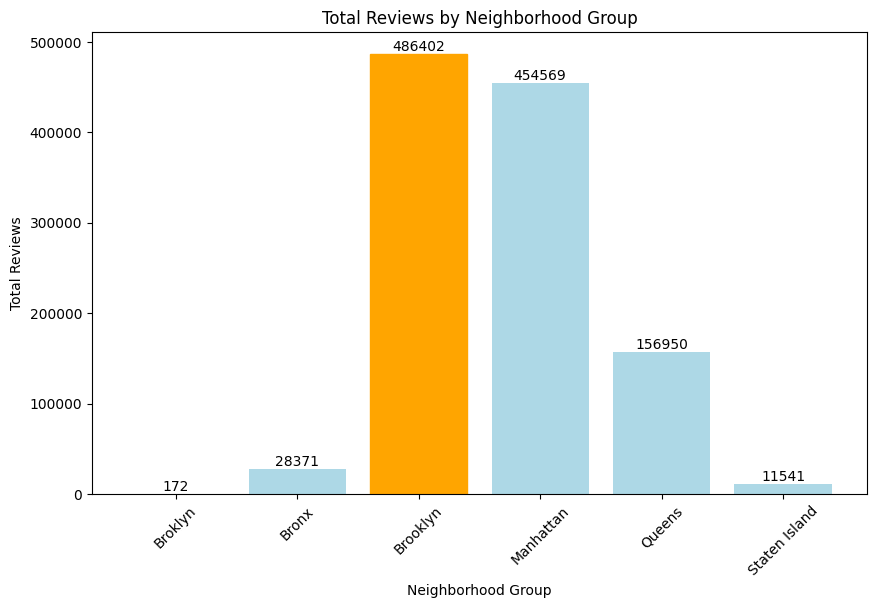

In [ ]:
reviews_by_neighbourhood = df.groupby('neighbourhood group')['number_of_reviews'].sum()

# Step 2: Identify the neighborhood group with the highest number of reviews
top_neighbourhood_group = reviews_by_neighbourhood.idxmax()
top_neighbourhood_reviews = reviews_by_neighbourhood.max()

# Print the result
print(f"Neighborhood group with the highest number of reviews: {top_neighbourhood_group}")
print(f"Total reviews: {top_neighbourhood_reviews}")

# Step 3: Create a bar chart to visualize the reviews by neighborhood group
plt.figure(figsize=(10, 6))
bars = plt.bar(reviews_by_neighbourhood.index, reviews_by_neighbourhood, color='lightblue')

# Highlight the bar with the highest reviews
for bar in bars:
    if bar.get_height() == top_neighbourhood_reviews:
        bar.set_color('orange')  # Highlight color for the bar with the highest reviews

# Add labels and title
plt.xlabel('Neighborhood Group')
plt.ylabel('Total Reviews')
plt.title('Total Reviews by Neighborhood Group')
plt.xticks(rotation=45)

# Display the total reviews on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

plt.show()